# DETECTING SPAMMERS ON SOCIAL NETWORKS

## INSTRUCTORS : Dr. Ayan Seal , Dr. Kusum Kumari Bharti

### By :[Group:9] Surya Prakash Mourya(2015258) , Raja Nigwal (2015197), Pradeep Kumar(2015181) 












#### Loading Dataset of weibo website (weibo is chinese social network)

In [45]:
import pandas as pd
import numpy as np

In [2]:
follower_df = pd.read_csv("follower_followee.csv", encoding = "gb18030")
post_df = pd.read_csv("post.csv", encoding = "gb18030")
user_post_df= pd.read_csv("user_post.csv", encoding = "gb18030")
weibo_user_df = pd.read_csv("weibo_user.csv", encoding = "gb18030")

C:\Users\Pradeep Kumar\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Data Cleaning and Preprocessing Step

In [5]:
follower_df.head()

,id,guanzhu,fensi,post_num,gender,first_or_last
0,169270,1415,49,33,female,first
1,169271,67,4,1,female,first
2,169272,1501,58,34,male,first
3,169273,1583,104,179,female,first
4,169274,1442,45,108,female,first


In [6]:
follower_df = follower_df[["id", "guanzhu", "fensi", "post_num", "gender", "first_or_last"]]

In [7]:
follower_df.head()

,id,guanzhu,fensi,post_num,gender,first_or_last
0,169270,1415,49,33,female,first
1,169271,67,4,1,female,first
2,169272,1501,58,34,male,first
3,169273,1583,104,179,female,first
4,169274,1442,45,108,female,first


In [9]:
post_df.head()

,post_id,scratch_time,post_time,content,image,poster,poster_id,poster_url,repost_num,comment_num,repost_post_id
0,3.777580e+15,2014/11/17 10:30,2014/11/16 16:45,爆美来袭独家实拍质量看的见招微信代理一件代发专卖国际品牌名鞋品质赢得市场诚信赚得人心V信：a...,http://tp1.sinaimg.cn/2364770064/50/22844411852/1,新百伦商城,2364770064,http://weibo.com/527loveyou,0,0,NaN
1,3.777620e+15,2014/11/17 15:45,2014/11/16 19:58,【奥汀羽酵素反馈】效果不好也不会卖这么好。正常吃饭，不用节食，不用运动，健康绿色没有副作用。...,http://tp3.sinaimg.cn/2346769694/50/5704078058/0,孚禾静静_,2346769694,http://weibo.com/206445959,0,0,NaN
2,3.777620e+15,2014/11/17 20:08,2014/11/16 19:58,我有话说【世界最穷总统拒绝酋长高价收购其老旧座驾】共产党员？http://t.cn/RzvUwBM,http://tp2.sinaimg.cn/2747799853/50/0/1,IT经济学,2747799853,http://weibo.com/u/2747799853,0,0,NaN
3,3.777620e+15,2014/11/17 20:08,2014/11/16 19:57,【蚕丝皂】吸附黑头的能力一级棒，清洁不选它是你没眼光[撇嘴][撇嘴]西游记申请吉尼斯百元哥被...,http://tp3.sinaimg.cn/2346769694/50/5704078058/0,孚禾静静_,2346769694,http://weibo.com/206445959,0,0,NaN
4,3.777620e+15,2014/11/17 20:09,2014/11/16 19:57,我活得很好！//【世界最穷总统拒绝酋长高价收购其老旧座驾】http://t.cn/RzvUwDk,http://tp2.sinaimg.cn/5136475477/50/0/1,很久很久58172,5136475477,http://weibo.com/u/5136475477,0,0,NaN


In [10]:
post_df = post_df[["post_id", "scratch_time", "post_time", "poster_id", "repost_num", "comment_num"]]
post_df.head()

,post_id,scratch_time,post_time,poster_id,repost_num,comment_num
0,3.777580e+15,2014/11/17 10:30,2014/11/16 16:45,2364770064,0,0
1,3.777620e+15,2014/11/17 15:45,2014/11/16 19:58,2346769694,0,0
2,3.777620e+15,2014/11/17 20:08,2014/11/16 19:58,2747799853,0,0
3,3.777620e+15,2014/11/17 20:08,2014/11/16 19:57,2346769694,0,0
4,3.777620e+15,2014/11/17 20:09,2014/11/16 19:57,5136475477,0,0


In [12]:
user_post_df.head()

,post_id,post_time,content,poster_id,poster_url,repost_num,comment_num,repost_post_id,inner_flag,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,3.744660e+15,2014/8/17 21:00,置顶#代理须知#拒绝泛滥，我不会每天一直更新图片的，图片有专门的地方，为了不影响其他顾客正常...,2364770064,http://weibo.com/2364770064,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.777580e+15,2014/11/16 16:45,爆美来袭独家实拍质量看的见招微信代理一件代发专卖国际品牌名鞋品质赢得市场诚信赚得人心V信：a...,2364770064,http://weibo.com/2364770064,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.777570e+15,2014/11/16 16:29,爆美来袭独家实拍质量看的见招微信代理一件代发专卖国际品牌名鞋品质赢得市场诚信赚得人心V信：a...,2364770064,http://weibo.com/2364770064,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.777570e+15,2014/11/16 16:19,爆美来袭独家实拍招微信代理一件代发专卖国际品牌名鞋品质赢得市场诚信赚得人心V信：asicsh...,2364770064,http://weibo.com/2364770064,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.777570e+15,2014/11/16 16:11,独家实拍招微信代理一件代发专卖国际品牌名鞋品质赢得市场诚信赚得人心V信：asicshoesQ...,2364770064,http://weibo.com/2364770064,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
user_post_df = user_post_df[["post_id", "post_time", "poster_id", "repost_num", "comment_num"]]
user_post_df.head()

,post_id,post_time,poster_id,repost_num,comment_num
0,3.744660e+15,2014/8/17 21:00,2364770064,0,0
1,3.777580e+15,2014/11/16 16:45,2364770064,0,0
2,3.777570e+15,2014/11/16 16:29,2364770064,0,0
3,3.777570e+15,2014/11/16 16:19,2364770064,0,0
4,3.777570e+15,2014/11/16 16:11,2364770064,0,0


In [14]:
weibo_user_df

,user_id,user_name,user_image,gender,class,message,post_num,follower_num,followee_num,is_spammer,Unnamed: 10
0,1041514813,james1002,http://tp2.sinaimg.cn/1041514813/180/5708899731/1,male,5,Lv.5 浙江宁波 简介：诚信为本，站的高才能看的远。快乐开心每一天。,1557,1421,2000,NaN,NaN
1,1046222077,郑钧,http://tp2.sinaimg.cn/1046222077/180/5711167576/1,male,10,北京东城区 简介：且把悲歌欢唱 个性域名： zhengjun 博客地址： h...,1265,1280571,130,NaN,NaN
2,1049591831,波播阿波思密达,http://tp4.sinaimg.cn/1049591831/180/5710224593/0,female,5,Lv.5 吉林松原 1972年12月3日 简介：自由人，快乐族,503,302,968,NaN,NaN
3,1062050703,霞儿0109,http://tp4.sinaimg.cn/1062050703/180/1277084329/0,female,9,Lv.9 福建厦门 毕业于 厦门大学 公司 ChinaZ站长...,281,148,354,NaN,NaN
4,1071429143,紫荆花_18423,http://tp4.sinaimg.cn/1071429143/180/400610658...,female,5,Lv.5 广东湛江 毕业于 辽宁师范大学 公司 大学教师 ...,135,1975,2000,NaN,NaN
5,1087770692,陈坤,http://tp1.sinaimg.cn/1087770692/180/5708925460/1,male,13,重庆 简介：莫失己道，莫扰他心。 个性域名： chenkun 标签 演员,4461,74798328,488,NaN,NaN
6,1092538373,CCTV天下足球,http://tp2.sinaimg.cn/1092538373/180/5599827948/1,male,12,简介：《天下足球》，最纯粹的足球，最高级的享受！播出时间：每周一晚19:30-21:25,1222,516668,172,NaN,NaN
7,1114281232,菩提2589,http://tp1.sinaimg.cn/1114281232/180/5673736925/1,male,8,Lv.8 湖南长沙 简介：若你安好，便是晴天 标签 美女,333,199,598,NaN,NaN
8,1155631071,若水团,http://tp4.sinaimg.cn/1155631071/180/400214913...,female,11,Lv.11 海外其他 恋爱中 狮子座 简介：方便得前无古人后无来者...,10959,17399,368,NaN,NaN
9,1165712932,演员王澜,http://tp1.sinaimg.cn/1165712932/180/1299361151/0,female,9,北京朝阳区 毕业于 中央戏剧学院 天秤座 简介：(编辑部的故事)(五魁)...,5221,22572,423,NaN,NaN


In [15]:
weibo_user_df = weibo_user_df[["user_id", "class", "post_num", "follower_num", "followee_num", "is_spammer"]] 
weibo_user_df.head()

,user_id,class,post_num,follower_num,followee_num,is_spammer
0,1041514813,5,1557,1421,2000,NaN
1,1046222077,10,1265,1280571,130,NaN
2,1049591831,5,503,302,968,NaN
3,1062050703,9,281,148,354,NaN
4,1071429143,5,135,1975,2000,NaN


In [16]:
weibo_user_df = weibo_user_df.dropna()
weibo_user_df

,user_id,class,post_num,follower_num,followee_num,is_spammer
11,1195264701,9,603,141,392,1.0
48,1402869242,5,149,463,952,1.0
50,1465128481,0,33,208,1833,1.0
51,1487256502,6,557,60,1528,1.0
55,1504709690,7,820,342,387,-1.0
61,1588859384,5,311,146,155,-1.0
65,1606071642,12,5628,603,2001,-1.0
72,1638396745,1,107,160,916,1.0
81,1656183985,5,154,308,1977,1.0
90,1680755467,6,284,43,59,-1.0


In [17]:
max(weibo_user_df.post_num)

'wvr=6&amp'

In [18]:
weibo_user_df = weibo_user_df[weibo_user_df.post_num!=max(weibo_user_df.post_num)]
weibo_user_df

,user_id,class,post_num,follower_num,followee_num,is_spammer
11,1195264701,9,603,141,392,1.0
48,1402869242,5,149,463,952,1.0
50,1465128481,0,33,208,1833,1.0
51,1487256502,6,557,60,1528,1.0
55,1504709690,7,820,342,387,-1.0
61,1588859384,5,311,146,155,-1.0
65,1606071642,12,5628,603,2001,-1.0
72,1638396745,1,107,160,916,1.0
81,1656183985,5,154,308,1977,1.0
90,1680755467,6,284,43,59,-1.0


In [19]:
max(weibo_user_df.followee_num)

354283

In [20]:
weibo_user_df = weibo_user_df[weibo_user_df.post_num!=max(weibo_user_df.post_num)]
weibo_user_df
# run this untill u get an integer

,user_id,class,post_num,follower_num,followee_num,is_spammer
11,1195264701,9,603,141,392,1.0
48,1402869242,5,149,463,952,1.0
50,1465128481,0,33,208,1833,1.0
51,1487256502,6,557,60,1528,1.0
55,1504709690,7,820,342,387,-1.0
61,1588859384,5,311,146,155,-1.0
65,1606071642,12,5628,603,2001,-1.0
72,1638396745,1,107,160,916,1.0
81,1656183985,5,154,308,1977,1.0
90,1680755467,6,284,43,59,-1.0


In [21]:
max(weibo_user_df.post_num)

'CVISION全球旅拍摄影团队|更多作品请关注@见熊摄影师|约片QQ:896336952(微信同步)  '

In [22]:
max(weibo_user_df['class'])

12

In [23]:
max(weibo_user_df.follower_num)

'98'

In [24]:
max(weibo_user_df.followee_num)

354283

In [25]:
max(weibo_user_df.is_spammer)

2672.0

In [26]:
weibo_user_df = weibo_user_df[weibo_user_df.is_spammer!=max(weibo_user_df.is_spammer)]
weibo_user_df

,user_id,class,post_num,follower_num,followee_num,is_spammer
11,1195264701,9,603,141,392,1.0
48,1402869242,5,149,463,952,1.0
50,1465128481,0,33,208,1833,1.0
51,1487256502,6,557,60,1528,1.0
55,1504709690,7,820,342,387,-1.0
61,1588859384,5,311,146,155,-1.0
65,1606071642,12,5628,603,2001,-1.0
72,1638396745,1,107,160,916,1.0
81,1656183985,5,154,308,1977,1.0
90,1680755467,6,284,43,59,-1.0


In [50]:
weibo_user_df['numeric'] = weibo_user_df['post_num'].apply(lambda x: str.isnumeric(x))


C:\Users\Pradeep Kumar\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
weibo_user_df =  weibo_user_df[weibo_user_df.numeric == True]

In [54]:
len(weibo_user_df[weibo_user_df.numeric == False])

0

In [55]:
min(weibo_user_df.is_spammer)

-1.0

#### Dividing Spammers and Non Spammers  And Plotting Scatter Plot

In [56]:
#weibo_user_df['follower_num'] = pd.to_numeric(weibo_user_df['follower_num'])
#weibo_user_df['diff'] = weibo_user_df['follower_num']- weibo_user_df['followee_num']
#weibo_user_df.head()

In [57]:
df_non_spammer = weibo_user_df[weibo_user_df['is_spammer']==-1]
df_non_spammer = df_non_spammer.reset_index(drop = 'TRUE')
df_non_spammer.head()

,user_id,class,post_num,follower_num,followee_num,is_spammer,numeric
0,1504709690,7,820,342,387,-1.0,True
1,1588859384,5,311,146,155,-1.0,True
2,1606071642,12,5628,603,2001,-1.0,True
3,1680755467,6,284,43,59,-1.0,True
4,1695220825,11,2426,513,528,-1.0,True


In [58]:
df_spammer = weibo_user_df[weibo_user_df['is_spammer']==1]
df_spammer = df_spammer.reset_index(drop = 'TRUE')
df_spammer.head()

,user_id,class,post_num,follower_num,followee_num,is_spammer,numeric
0,1195264701,9,603,141,392,1.0,True
1,1402869242,5,149,463,952,1.0,True
2,1465128481,0,33,208,1833,1.0,True
3,1487256502,6,557,60,1528,1.0,True
4,1638396745,1,107,160,916,1.0,True


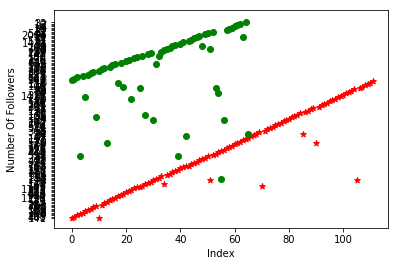

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('Index')
plt.ylabel('Number Of Followers')
plt.scatter(df_spammer.index, df_spammer['follower_num'], color='red', marker ='*')
plt.scatter(df_non_spammer.index, df_non_spammer['follower_num'], color='green')

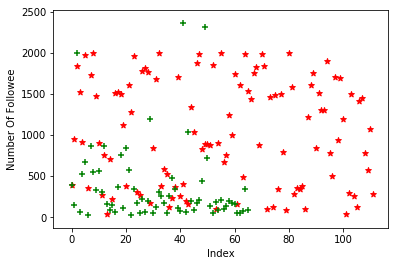

In [60]:
plt.xlabel('Index')
plt.ylabel('Number Of Followee')
plt.scatter(df_spammer.index, df_spammer['followee_num'], color='red', marker ='*')
plt.scatter(df_non_spammer.index, df_non_spammer['followee_num'], color='green', marker ='+')

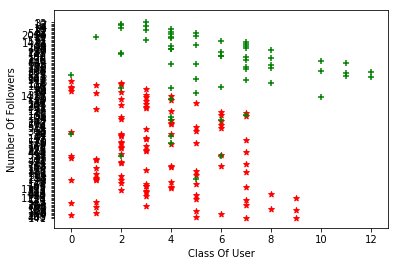

In [61]:
plt.xlabel('Class Of User')
plt.ylabel('Number Of Followers')
plt.scatter(df_spammer['class'], df_spammer.follower_num, color='red', marker ='*')
plt.scatter(df_non_spammer['class'], df_non_spammer.follower_num, color='green', marker ='+')

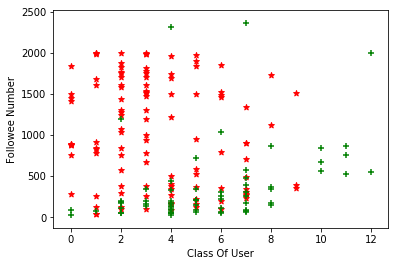

In [62]:
plt.xlabel('Class Of User')
plt.ylabel('Followee Number')
plt.scatter(df_spammer['class'], df_spammer.followee_num, color='red', marker ='*')
plt.scatter(df_non_spammer['class'], df_non_spammer.followee_num, color='green', marker ='+')

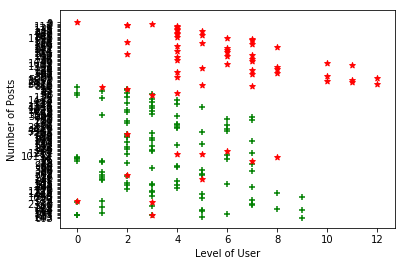

In [63]:
plt.xlabel('Level of User')
plt.ylabel('Number of Posts')
plt.scatter(df_spammer['class'], df_spammer['post_num'], color='green', marker ='+')
plt.scatter(df_non_spammer['class'], df_non_spammer['post_num'], color='red', marker ='*')

#### Data Preparation

In [64]:
#weibo_user_df[weibo_user_df.post_num.apply(lambda x: x.isnumeric())]
#weibo_user_df[weibo_user_df.follower_num.apply(lambda x: x.isnumeric())]

In [65]:
#weibo_user_df['diff'] = int(weibo_user_df['followee_num']) - int(weibo_user_df['follower_num'])
X = weibo_user_df.iloc[:,[2,3,4]]
X.head()

,post_num,follower_num,followee_num
11,603,141,392
48,149,463,952
50,33,208,1833
51,557,60,1528
55,820,342,387


In [66]:
y = weibo_user_df.iloc[:,5]
y.head()

11    1.0
48    1.0
50    1.0
51    1.0
55   -1.0
Name: is_spammer, dtype: float64

#### Feature Scaling , Test-Train Split And Training SVM models with different kernels

In [67]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [68]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [69]:
from sklearn.svm import SVC
model1 = SVC(C= 128, gamma = 0.01330, kernel = 'rbf')
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
import seaborn as sn

#### Kernel = 'rbf'


 Accuracy: 88.88888888888889 %

 Confusion Matrix: 

[[ 6  1]
 [ 1 10]]

 TABLE: 

  Label  Precision    FScore    Recall  Support
0    -1   0.857143  0.857143  0.857143        7
1     1   0.909091  0.909091  0.909091       11

 HEAT MAP: 


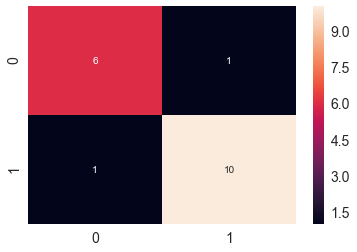

In [70]:
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test) 
cm1 = confusion_matrix(y_test, pred1)
print("\n Accuracy:", model1.score(X_test,y_test)*100, "%")
print("\n Confusion Matrix: \n")
print(cm1)
print("\n TABLE: \n")

precision, recall, fscore, support = score(y_test, pred1)
df_tab1 = pd.DataFrame({'Label' : ['-1','1'], 'Precision' : precision, 'Recall': recall, 'FScore' : fscore, 'Support' : support})
df_tab1 = df_tab1[['Label', 'Precision', 'FScore', 'Recall', 'Support']]
print(df_tab1)


print("\n HEAT MAP: ")

df_cm1 = pd.DataFrame(cm1, range(2),range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 10})# font size

#### kernel = 'linear'


 Accuracy: 77.77777777777779 %

 Confusion Matrix: 

[[5 2]
 [2 9]]

 TABLE: 

  Label  Precision    FScore    Recall  Support
0    -1   0.714286  0.714286  0.714286        7
1     1   0.818182  0.818182  0.818182       11

 HEAT MAP: 


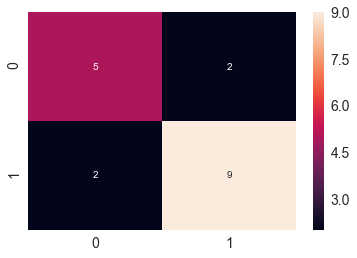

In [71]:
model2 = SVC(C= 128, gamma = 0.01330, kernel = 'linear')
model2.fit(X_train,y_train)
pred1 = model2.predict(X_test) 
cm1 = confusion_matrix(y_test, pred1)
print("\n Accuracy:", model2.score(X_test,y_test)*100, "%")
print("\n Confusion Matrix: \n")
print(cm1)
print("\n TABLE: \n")

precision, recall, fscore, support = score(y_test, pred1)
df_tab1 = pd.DataFrame({'Label' : ['-1','1'], 'Precision' : precision, 'Recall': recall, 'FScore' : fscore, 'Support' : support})
df_tab1 = df_tab1[['Label', 'Precision', 'FScore', 'Recall', 'Support']]
print(df_tab1)


print("\n HEAT MAP: ")

df_cm1 = pd.DataFrame(cm1, range(2),range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 10})# font size

#### kernel = 'poly'


 Accuracy: 61.111111111111114 %

 Confusion Matrix: 

[[ 0  7]
 [ 0 11]]

 TABLE: 

  Label  Precision    FScore  Recall  Support
0    -1   0.000000  0.000000     0.0        7
1     1   0.611111  0.758621     1.0       11

 HEAT MAP: 


C:\Users\Pradeep Kumar\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


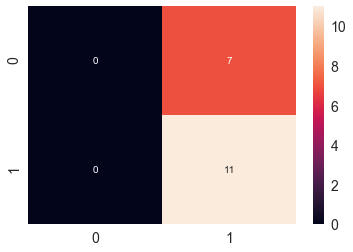

In [72]:
model3 = SVC(C= 128, gamma = 0.01330, kernel = 'poly')
model3.fit(X_train,y_train)
pred1 = model3.predict(X_test) 
cm1 = confusion_matrix(y_test, pred1)
print("\n Accuracy:", model3.score(X_test,y_test)*100, "%")
print("\n Confusion Matrix: \n")
print(cm1)
print("\n TABLE: \n")

precision, recall, fscore, support = score(y_test, pred1)
df_tab1 = pd.DataFrame({'Label' : ['-1','1'], 'Precision' : precision, 'Recall': recall, 'FScore' : fscore, 'Support' : support})
df_tab1 = df_tab1[['Label', 'Precision', 'FScore', 'Recall', 'Support']]
print(df_tab1)


print("\n HEAT MAP: ")

df_cm1 = pd.DataFrame(cm1, range(2),range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 10})# font size

#### kernel = 'sigmoid'


 Accuracy: 77.77777777777779 %

 Confusion Matrix: 

[[6 1]
 [3 8]]

 TABLE: 

  Label  Precision  FScore    Recall  Support
0    -1   0.666667    0.75  0.857143        7
1     1   0.888889    0.80  0.727273       11

 HEAT MAP: 


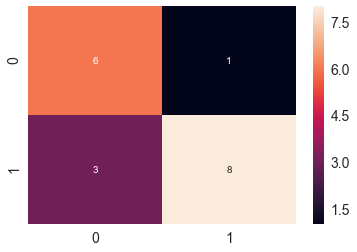

In [73]:
model4 = SVC(C= 128, gamma = 0.01330, kernel = 'sigmoid')
model4.fit(X_train,y_train)
pred1 = model4.predict(X_test) 
cm1 = confusion_matrix(y_test, pred1)
print("\n Accuracy:", model4.score(X_test,y_test)*100, "%")
print("\n Confusion Matrix: \n")
print(cm1)
print("\n TABLE: \n")

precision, recall, fscore, support = score(y_test, pred1)
df_tab1 = pd.DataFrame({'Label' : ['-1','1'], 'Precision' : precision, 'Recall': recall, 'FScore' : fscore, 'Support' : support})
df_tab1 = df_tab1[['Label', 'Precision', 'FScore', 'Recall', 'Support']]
print(df_tab1)


print("\n HEAT MAP: ")

df_cm1 = pd.DataFrame(cm1, range(2),range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 10})# font size

In [74]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()

#### Decision Tree Classifier


 Accuracy: 83.33333333333334 %

 Confusion Matrix: 

[[ 4  3]
 [ 0 11]]

 TABLE: 

  Label  Precision    FScore    Recall  Support
0    -1   1.000000  0.727273  0.571429        7
1     1   0.785714  0.880000  1.000000       11

 HEAT MAP: 


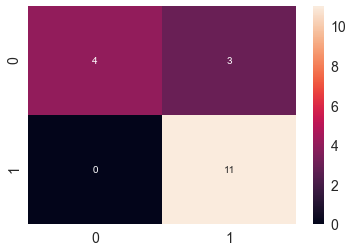

In [75]:
model5.fit(X_train,y_train)
pred1 = model5.predict(X_test) 
cm1 = confusion_matrix(y_test, pred1)
print("\n Accuracy:", model5.score(X_test,y_test)*100, "%")
print("\n Confusion Matrix: \n")
print(cm1)
print("\n TABLE: \n")

precision, recall, fscore, support = score(y_test, pred1)
df_tab1 = pd.DataFrame({'Label' : ['-1','1'], 'Precision' : precision, 'Recall': recall, 'FScore' : fscore, 'Support' : support})
df_tab1 = df_tab1[['Label', 'Precision', 'FScore', 'Recall', 'Support']]
print(df_tab1)


print("\n HEAT MAP: ")

df_cm1 = pd.DataFrame(cm1, range(2),range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 10})# font size

#### Naive Bayes Classifier


 Accuracy: 83.33333333333334 %

 Confusion Matrix: 

[[ 5  2]
 [ 1 10]]

 TABLE: 

  Label  Precision    FScore    Recall  Support
0    -1   0.833333  0.769231  0.714286        7
1     1   0.833333  0.869565  0.909091       11

 HEAT MAP: 


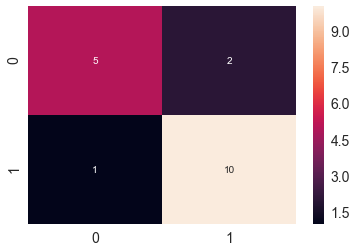

In [76]:
model6.fit(X_train,y_train)
pred1 = model6.predict(X_test) 
cm1 = confusion_matrix(y_test, pred1)
print("\n Accuracy:", model6.score(X_test,y_test)*100, "%")
print("\n Confusion Matrix: \n")
print(cm1)
print("\n TABLE: \n")

precision, recall, fscore, support = score(y_test, pred1)
df_tab1 = pd.DataFrame({'Label' : ['-1','1'], 'Precision' : precision, 'Recall': recall, 'FScore' : fscore, 'Support' : support})
df_tab1 = df_tab1[['Label', 'Precision', 'FScore', 'Recall', 'Support']]
print(df_tab1)


print("\n HEAT MAP: ")

df_cm1 = pd.DataFrame(cm1, range(2),range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 10})# font size